In [3]:
import ndjson
import json
import pandas as pd
import numpy as np
import seaborn as sns

# reading reviews from json file

In [4]:
# reading reviews from json file
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

In [5]:
reviews_df = pd.DataFrame(data)


In [6]:
reviews_df.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


# Data Dictionry
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

In [7]:
reviews_df.shape


(497577, 12)

In [8]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


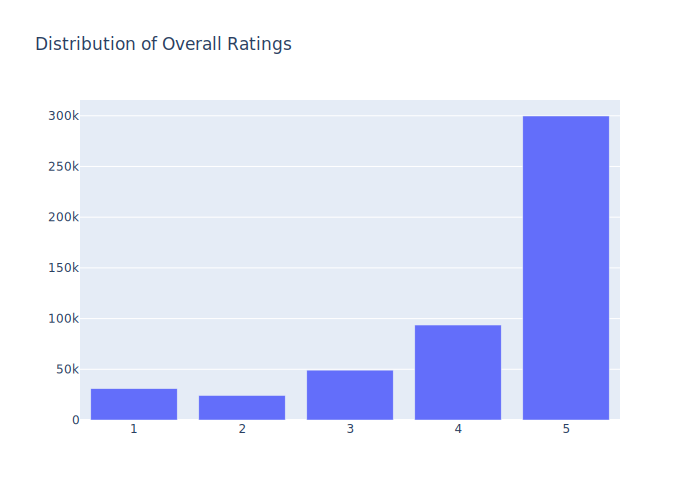

In [10]:
import plotly.graph_objects as go

count_data = reviews_df['overall'].value_counts().sort_index()

fig = go.Figure(
    data=[go.Bar(x=count_data.index, y=count_data.values)],
    layout_title_text="Distribution of Overall Ratings"
)

fig.show(renderer="svg")  

In [11]:
len(reviews_df['asin'].value_counts(dropna=False))


17408

# Undersampling of Reviews

aking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.

In [12]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [13]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)


In [14]:
undersampled_reviews['overall'].value_counts(dropna=False)


overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

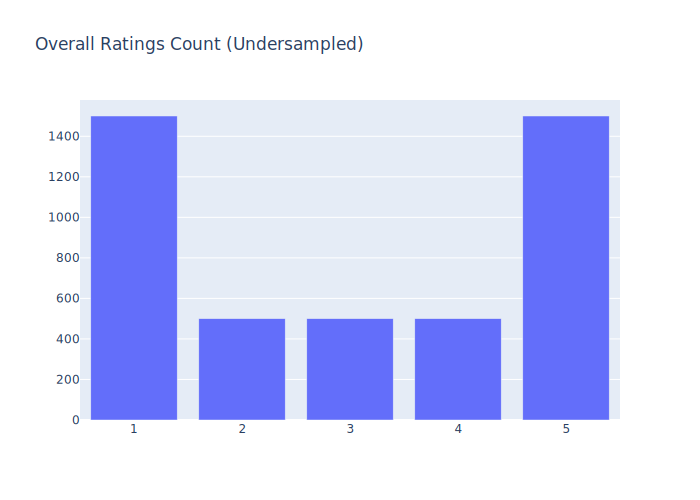

In [15]:
import plotly.graph_objects as go

counts = undersampled_reviews['overall'].value_counts().sort_index()

fig = go.Figure(
    data=[go.Bar(x=counts.index, y=counts.values)],
    layout_title_text="Overall Ratings Count (Undersampled)"
)
fig.show(renderer="svg")


# Random Sampling of 100K Reviews


In [16]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)


# Writing Corpora


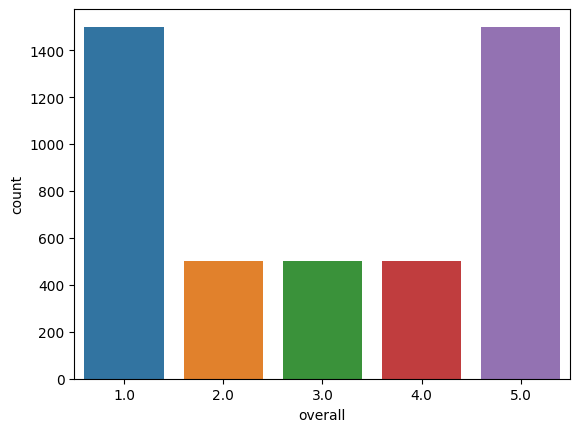

In [23]:
import os

output_dir = r"D:\NLP\statement analysis"
os.makedirs(output_dir, exist_ok=True)

undersampled_reviews.to_csv(os.path.join(output_dir, "undersampled_reviews.csv"), index=False)
sample_100K_revs.to_csv(os.path.join(output_dir, "big_corpus.csv"), index=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=undersampled_reviews, x='overall')
plt.show()
